## Contents <a id='top'></a>

1. <a href=#np>NumPy</a>
1. <a href=#pandas>Pandas</a>
    1. <a href=#pandas>Series</a>
    1. <a href=#df>DataFrames</a>
    1. <a href=#functions>Applying Functions to DataFrame</a>
    1. <a href=#categorical>Categorical Variables</a>
    1. <a href=#split>Split-Apply-Transform</a>
    1. <a href=#multiple>Working with Multiple DataFrames</a>
1. <a href=#ref>References and Links</a>

In [1]:
import numpy as np
import pandas as pd

# %precision 4
# %matplotlib inline

# pd.set_option('display.precision', 4)

<a id='np'></a>
# 1. NumPy
<a href=#top>(back to top)</a>

The basic object in this package is the `ndarray` object, which can represent *n*-dimensional arrays of homogeneous data types. This is the key difference between NumPy and Pandas objects -- while Pandas objects are also tabular in nature, they allow you to deal with inhomogenous objects. Specifically, Pandas' `DataFrame`s allow columns to be of different types.

An `ndarray` object is an *n*-dimensional array (i.e., a [tensor](https://www.i2tutorials.com/wp-content/uploads/2019/09/Tensor-Datatype-and-Ranks-1i2tutorials.jpg)) of elements, indexed by a tuple of non-negative integers.

The dimensions of the array are referred to as **axes** in NumPy: a three-dimensional array will have three axes.

Each array has several attributes. These include:
* `ndim`: the number of axes/dimensions.
* `shape`: a tuple describing the length of each dimension.
* `size`: the total number of elements in the array. This is a product of the integers in the shape attribute.

In [ ]:
arr = np.array([(1.5, 2, 3), (4, 5, 6)])

In [ ]:
arr

In [ ]:
arr.ndim

In [ ]:
arr.shape

In [ ]:
arr.size # the number of elements in "arr"

### Array Creation

One way to create an array containing regular sequences is to use the `np.arange()` function. This creates a sequence of integers, with a specified separation.

In [ ]:
seq = np.arange(0, 10, 3)
seq, seq[:, None]

The shape of an `ndarray` is given by a tuple. Note that an array of shape (4,) is different from one with shape (4, 1). The former has only **1 dimension**, while the latter has **2 dimensions**.

In [ ]:
seq.shape, seq[:, None].shape

In [ ]:
col_vect = seq.reshape(4, 1) # (4, -1)
col_vect

To create an array of regularly spaced **real numbers**, use `np.linspace()`.

In [15]:
arr_real = np.linspace(start = 0.2, stop = 3.3, num = 24).reshape(2, 3, 4)  
arr_real

array([[[0.2       , 0.33478261, 0.46956522, 0.60434783],
        [0.73913043, 0.87391304, 1.00869565, 1.14347826],
        [1.27826087, 1.41304348, 1.54782609, 1.6826087 ]],

       [[1.8173913 , 1.95217391, 2.08695652, 2.22173913],
        [2.35652174, 2.49130435, 2.62608696, 2.76086957],
        [2.89565217, 3.03043478, 3.16521739, 3.3       ]]])

In [ ]:
np.arange(24).reshape(4, 3, 2)

Sometimes we need to create a placeholder array with the appropriate dimensions, and then fill it in later. This is preferrable to growing an array by appending to it.

In [ ]:
np.zeros((3, 5)) # there is also an np.ones() function

Instead of specifying the dimensions of an array ourselves, we can create arrays of zeros or ones in the shape of other existing arrays.

In [ ]:
# Creates an array of zeros, of the same shape as "arr_real".
np.ones_like(arr_real)

In [ ]:
np.zeros_like(arr_real)

### Slice Operator in Multiple Dimensions

Multidimensional NumPy arrays can be accessed with comma separated slice notation. When fewer indices are provided than the number of axes, the missing indices are considered complete slices for the remaining dimensions.

By the way, when printing, the *last* axis will be printed left-to-right, and the second last axis will be printed from top-to-bottom. The remaining axes will be printed with a line in between:

In [ ]:
arr_real

Here are examples based on this array. Try to guess what each will return before you run it:

In [ ]:
arr_real[1, 2, 3]

In [ ]:
arr_real[0, 2, ::-1]

In [ ]:
arr_real[1, 0:3:2]

In [ ]:
arr_real[:, 2, :]

Here are examples using Boolean indexing, which means that we use an array of `True` and `False` entries to determine which elements to return.

In [ ]:
(arr_real > 3).reshape(1,-1).shape

In [ ]:
arr_real[(arr_real > 3)]

### Basic Operations

In [ ]:
# Setting a seed allows for reproducibility of random number generation
# across sessions.
np.random.seed(5003)

In [ ]:
a = np.random.randn(3, 5)
a

In [ ]:
b = np.random.randn(3, 5)
b

In [ ]:
# Element-wise addition.
a + b

In [ ]:
# Element-wise multiplication: NOT matrix multiplication.
a * b

In [ ]:
# Matrix multiplication (need to transpose "b" to match get the right dimensions).
# We can also do "a @ b.T".

# a.dot(b.T)
a @ b.T

In [ ]:
np.ones_like(arr_real).ravel().shape   # ndarray.flatten()  to 1-D vector

### Broadcasting

In [ ]:
2 * a + 1

It's easy enough to guess what happened there, but what if we added a 4 x 5 array to a 2 x 1 x 5 array? In general what would happen if we operated on two arrays with different shapes? 

That's when the broadcasting rules come into play.

1. If all input arrays do not have the same number of dimensions, a "1" will be *pre-pended* to the **shapes** of the smaller arrays until all the arrays have the same number of dimensions.
2. Arrays with size 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension.

In [2]:
x = np.arange(4)           # shape           4
x, x.shape

(array([0, 1, 2, 3]), (4,))

In [3]:
xx = x.reshape((4, 1))      # shape       4 x 1
xx

array([[0],
       [1],
       [2],
       [3]])

In [4]:
xx + x                     # shape       4 x 4

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

`x` acts like an array with size (1, 4) in the addition above, and rule 2 applies for `xx`.
The following code gives us the same output:

In [5]:
np.tile(xx, 4) + x.reshape((1, 4))

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

In [13]:
y = np.ones(8).reshape(2,-1)           # shape           5
x + y

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [8]:
xx + y                  # shape        4 x 5

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [7]:
z = np.ones((3, 4))
x + z

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

### Axis-wise Operations

In [16]:
arr_real.shape

(2, 3, 4)

In [18]:
arr_real

array([[[0.2       , 0.33478261, 0.46956522, 0.60434783],
        [0.73913043, 0.87391304, 1.00869565, 1.14347826],
        [1.27826087, 1.41304348, 1.54782609, 1.6826087 ]],

       [[1.8173913 , 1.95217391, 2.08695652, 2.22173913],
        [2.35652174, 2.49130435, 2.62608696, 2.76086957],
        [2.89565217, 3.03043478, 3.16521739, 3.3       ]]])

In [19]:
arr_real.mean(axis = 0) # mean across the 0th ("first") axis

array([[1.00869565, 1.14347826, 1.27826087, 1.41304348],
       [1.54782609, 1.6826087 , 1.8173913 , 1.95217391],
       [2.08695652, 2.22173913, 2.35652174, 2.49130435]])

The top-left element comes from the mean of `arr_real[0, 0, 0]` and `arr_real[1, 0, 0]`. Similarly, the element to the right of it comes from the mean of `arr_real[0, 0, 1]` and `arr_real[1, 0, 1]`.

In [25]:
(arr_real[0, 0, 1] + arr_real[1, 0, 1]) / 2

1.143478260869565

In [28]:
arr_real.mean(axis = 1)

array([[0.73913043, 0.87391304, 1.00869565, 1.14347826],
       [2.35652174, 2.49130435, 2.62608696, 2.76086957]])

In [29]:
arr_real.mean(axis = (0, 1)) # the mean across the first two axes

array([1.54782609, 1.6826087 , 1.8173913 , 1.95217391])

In [ ]:
arr_real.mean(axis = 2) # which is the mean across the third axis

Note that `arr_real[0]` is a 2D array, with shape (3, 4). Suppose we wish to compute the row means. This means we have to apply the operation by the column axis (axis = 1).

In [30]:
arr_real[0].mean(axis = 1) # the mean across the second axis of arr_real[0], not of arr_real itself.

array([0.40217391, 0.94130435, 1.48043478])

If we wanted to identify the row with the largest mean, we use `argmax()` on the resulting array.

In [31]:
arr_real[0].mean(axis = 1).argmax()

2

<a id='pandas'></a>
# 2. Pandas
<a href=#top>(back to top)</a>

## Series 

A *Series* is a one-dimensional labeled array. The axis labels are referred to as the **index**. The simplest way to create a Series is to pass a sequence and an index to `pd.Series()`.

In [32]:
year = pd.Series(list(range(2010, 2013) ) * 3)

team = ["Barcelona", "RealMadrid", "Valencia"] * 3
team.sort()
team = pd.Series(team)

wins = pd.Series([30, 28, 32, 29, 32, 26, 21, 17, 19])
draws = pd.Series([6, 7, 4, 5, 4, 7, 8, 10, 8])
losses = pd.Series([2, 3, 2, 4, 2, 5, 9, 11, 11])

In [33]:
year

0    2010
1    2011
2    2012
3    2010
4    2011
5    2012
6    2010
7    2011
8    2012
dtype: int64

In [34]:
team

0     Barcelona
1     Barcelona
2     Barcelona
3    RealMadrid
4    RealMadrid
5    RealMadrid
6      Valencia
7      Valencia
8      Valencia
dtype: object

In [40]:
type(wins.index), wins.index

(pandas.core.indexes.range.RangeIndex, RangeIndex(start=0, stop=9, step=1))

In [39]:
type(range(0,9))

range

In [36]:
wins.values

array([30, 28, 32, 29, 32, 26, 21, 17, 19])

To access particular values, we can use the slice operator.

In [41]:
wins[0:6:2]

0    30
2    32
4    32
dtype: int64

To convert a Series object to an `ndarray`, we use the following method:

In [45]:
wins.to_numpy()

array([30, 28, 32, 29, 32, 26, 21, 17, 19])

If we specify an index, we can use it to access values in the Series. With Pandas, using the slice operator with labels is inclusive on both sides!

In [42]:
s = pd.Series(np.random.randn(5), 
             index=['a', 'b', 'c', 'd', 'e'])
s

a   -1.028087
b    0.145177
c    0.310982
d   -0.804749
e   -0.355000
dtype: float64

In [44]:
s.index, type(s.index)

(Index(['a', 'b', 'c', 'd', 'e'], dtype='object'),
 pandas.core.indexes.base.Index)

In [46]:
s.values

array([-1.02808736,  0.14517714,  0.31098182, -0.80474946, -0.35499994])

In [47]:
s[['a', 'c']] 

a   -1.028087
c    0.310982
dtype: float64

Be careful when you combine the slice operator with label-based indexing. Unlike vanilla Python, Pandas includes **both** end-points!

In [48]:
s['a':'d']  # different from using numbers to slice, using labels including the last label

a   -1.028087
b    0.145177
c    0.310982
d   -0.804749
dtype: float64

<a id='df'></a>
## DataFrames

A *DataFrame* is a 2-dimensional labeled data structure with possibly **different** data types. It is the most commonly used Pandas object. The *index* of a DataFrame refers to the row labels (axis 0). The *columns* refer to the column labels (axis 1).

DataFrames can be constructed from Series, dictionaries, lists and 2-d arrays. For our course, we will typically create a DataFrame directly from a file.

We can create a DataFrame from the earlier series.

In [51]:
laliga = pd.DataFrame({'Year': year,
              'Team': team,
              'Wins': wins,
              'Draws': draws,
              'Losses': losses
})

To inspect a DataFrame, we can use `info()`, `head()` and `tail()` methods.

In [52]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    9 non-null      int64 
 1   Team    9 non-null      object
 2   Wins    9 non-null      int64 
 3   Draws   9 non-null      int64 
 4   Losses  9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [54]:
laliga.head()

,Year,Team,Wins,Draws,Losses
0,2010,Barcelona,30,6,2
1,2011,Barcelona,28,7,3
2,2012,Barcelona,32,4,2
3,2010,RealMadrid,29,5,4
4,2011,RealMadrid,32,4,2


We can also export the DataFrame to disk as plaintext (e.g., JSON, CSV, etc.).

In [55]:
laliga.to_json('../data/laliga.json')

In [58]:
import json

js = pd.read_json("../data/laliga.json")

In [59]:
js

,Year,Team,Wins,Draws,Losses
0,2010,Barcelona,30,6,2
1,2011,Barcelona,28,7,3
2,2012,Barcelona,32,4,2
3,2010,RealMadrid,29,5,4
4,2011,RealMadrid,32,4,2
5,2012,RealMadrid,26,7,5
6,2010,Valencia,21,8,9
7,2011,Valencia,17,10,11
8,2012,Valencia,19,8,11


### DataFrame from NumPy Arrays

In [ ]:
np.random.seed(5003)
x = np.random.randn(12, 5)
x_df = pd.DataFrame(x, columns = list('ABCDE')) # list(string) creates a list of its characters.

In [ ]:
x_df.head(n = 3)

In [ ]:
# We can convert DataFrames back to ndarrays.
x_df.to_numpy() == x

### Reading in Data

The CSV file read here contains the happiness scores of 164 countries from 2015 to 2017. Click [here](https://worldhappiness.report/ed/2017/) for a full report on the dataset.

The final score was based on many other factors (such as GDP per capita, family, freedom etc) which is included in the file as well. We will simplify things by just reading in the country, final score computed and year.

In each year, not all of the 164 countries had their scores surveyed and taken. This results in some countries having missing values (`NaN`) in certain years.

Besides reading in CSV formats, pandas can read in tab-separated files, Excel files and HDF5 files.

In [33]:
happ = pd.read_csv('../data/happiness_report.csv', header = 0, na_values = 'NA')

happ.head()
#happ.tail()
#happ.info()

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [92]:
happ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            492 non-null    object 
 1   Happiness.Rank     471 non-null    float64
 2   Happiness.Score    471 non-null    float64
 3   GDP                471 non-null    float64
 4   Family             471 non-null    float64
 5   Life.Expectancy    471 non-null    float64
 6   Freedom            471 non-null    float64
 7   Govt.Corruption    471 non-null    float64
 8   Generosity         471 non-null    float64
 9   Dystopia.Residual  471 non-null    float64
 10  Year               492 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 42.4+ KB


In [93]:
happ.tail()

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
487,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
488,Laos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
489,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
490,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
491,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [94]:
happ.columns, type(happ.columns)

(Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'GDP', 'Family',
        'Life.Expectancy', 'Freedom', 'Govt.Corruption', 'Generosity',
        'Dystopia.Residual', 'Year'],
       dtype='object'),
 pandas.core.indexes.base.Index)

In [71]:
happ.shape

(492, 11)

In [72]:
happ.describe()

,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,492.000000
mean,79.002123,5.368588,0.891742,1.056156,0.604288,0.422089,0.136741,0.240451,2.017120,2016.000000
std,45.379933,1.138111,0.413322,0.291996,0.246127,0.150433,0.114470,0.129208,0.548021,0.817328
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.517500,0.593250,0.904550,0.431752,0.319140,0.059815,0.152412,1.684842,2015.000000
50%,79.000000,5.268000,0.958470,1.095620,0.650880,0.436260,0.099872,0.219000,1.978736,2016.000000
75%,118.000000,6.168000,1.211830,1.265725,0.790819,0.542100,0.174220,0.318440,2.368290,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.602140,2017.000000


In [80]:
happ[happ['Country'] == 'Singapore']

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
23,Singapore,24.0,6.798,1.521860,1.020000,1.025250,0.542520,0.492100,0.311050,1.885010,2015
187,Singapore,24.0,6.798,1.521860,1.020000,1.025250,0.542520,0.492100,0.311050,1.885010,2016
353,Singapore,26.0,6.572,1.692278,1.353814,0.949492,0.549841,0.464308,0.345966,1.216362,2017


In [88]:
[happ['Govt.Corruption'] != np.nan]

[0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 487    True
 488    True
 489    True
 490    True
 491    True
 Name: Govt.Corruption, Length: 492, dtype: bool]

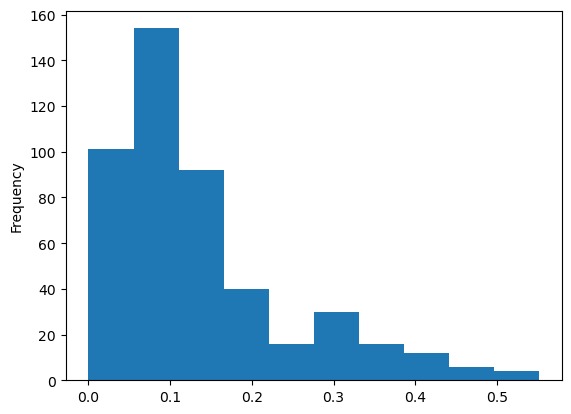

In [81]:
happ['Govt.Corruption'].plot(kind = "hist");

### Basic Selection

Row selection can be done with integers in the slice operator. In practice, this is not used, because we typically wish to select a set of rows based on a condition.

In [95]:
happ.index

RangeIndex(start=0, stop=492, step=1)

In [96]:
happ[10:12]

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
10,Israel,11.0,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854,2015
11,Costa Rica,12.0,7.226,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728,2015


To select columns, you may use a list of column names.

In [98]:
happ[['GDP', 'Freedom']] # note the difference with happ['GDP']
# happ.GDP.head()

,GDP,Freedom
0,1.39651,0.66557
1,1.30232,0.62877
2,1.32548,0.64938
3,1.45900,0.66973
4,1.32629,0.63297
...,...,...
487,NaN,NaN
488,NaN,NaN
489,NaN,NaN
490,NaN,NaN


Remember that we are not working with numpy arrays, so this will not work:

In [100]:
happ.iloc[0:10, 2:4]

,Happiness.Score,GDP
0,7.587,1.39651
1,7.561,1.30232
2,7.527,1.32548
3,7.522,1.45900
4,7.427,1.32629
5,7.406,1.29025
6,7.378,1.32944
7,7.364,1.33171
8,7.286,1.25018
9,7.284,1.33358


### Indexing and Selecting Data

The two main methods of advanced data selection use the `.loc` and `.iloc` functions. Although we call them functions, they are summoned using the `[ ]` notation. The `.loc` is primarily $$label-based$$. The common allowed inputs to `.loc` are 
* a single label,
* a list of labels,
* a slice object, 
* a boolean array.

The `.iloc` is primarily an $$integer-based $$input. The common allowed inputs to `.iloc` are 
* a single integer,
* a list of integers,
* a slice object, 
* a boolean array.
  
When selecting from a DataFrame with `.loc` or `.iloc`, we can provide a comma-separated index, just as with NumPy. It is good to keep this [reference](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) page bookmarked.

*Take note that this next command will only work if the Index is made up of integers!*

In [101]:
happ

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...
487,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
488,Laos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
489,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
490,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [102]:
happ.loc[2:5]

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015


In [103]:
happ.loc[[2, 3, 4, 5]]

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015


Notice how the slice operator inclusive when we use `.loc`, but not inclusive when we use `.iloc`.

In [105]:
happ.loc[2:10:4, "GDP":"Generosity":2]

,GDP,Life.Expectancy,Govt.Corruption
2,1.32548,0.87464,0.48357
6,1.32944,0.89284,0.31814
10,1.22857,0.91387,0.07785


In [108]:
happ.iloc[2:10:4, 3:7:2] # Same as above, but with .iloc

,GDP,Life.Expectancy
2,1.32548,0.87464
6,1.32944,0.89284


### Filtering Data

In [17]:
happ.iloc[:, 2:4].describe(percentiles=[0.25, .5, .80, .9])

,Happiness.Score,GDP
count,471.000000,471.000000
mean,5.368588,0.891742
std,1.138111,0.413322
min,2.693000,0.000000
25%,4.517500,0.593250
50%,5.268000,0.958470
80%,6.455000,1.281778
90%,6.951000,1.386040
max,7.587000,1.870766


It looks like Happiness Score is a left-skewed distribution. Suppose we are interested in the very happy countries. Here is how we can filter the data with a boolean array.

In [110]:
happiest = happ[happ['Happiness.Score'] > 6.95]

In [113]:
happiest

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
0,Switzerland,1.0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,2.0,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,3.0,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,4.0,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,5.0,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
5,Finland,6.0,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550,2015
6,Netherlands,7.0,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700,2015
7,Sweden,8.0,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190,2015
8,New Zealand,9.0,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250,2015
9,Australia,10.0,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460,2015


In [114]:
happiest.Country.nunique()

18

In [115]:
# happiest.Country.unique()
happiest['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Ireland', 'Germany'], dtype=object)

There isn't a single Asian or African country in the happiest 10% of countries!

We can also combine Boolean indices.

In [119]:
# Top 3 happiest countries in 2015

happ[(happ.Year == 2015) & (happ['Happiness.Rank'] <= 3)]
# happ[np.logical_and(happ.Year == 2015, happ['Happiness.Rank'] <= 3)]

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015


### Missing Values

The `.info()` method will yield information on missing values, column by column. We can see there are 21 rows with missing values. 

In [120]:
happ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            492 non-null    object 
 1   Happiness.Rank     471 non-null    float64
 2   Happiness.Score    471 non-null    float64
 3   GDP                471 non-null    float64
 4   Family             471 non-null    float64
 5   Life.Expectancy    471 non-null    float64
 6   Freedom            471 non-null    float64
 7   Govt.Corruption    471 non-null    float64
 8   Generosity         471 non-null    float64
 9   Dystopia.Residual  471 non-null    float64
 10  Year               492 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 42.4+ KB


*Sometimes*, it is appropriate to drop rows with missing values. This can be done with the `.dropna` method. Remember that it returns a new dataframe. The original one remains unchanged, unless you include the `inplace=True` argument.

In [127]:
happ.dropna(axis=0, how='any')

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
0,Switzerland,1.0,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,2.0,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,3.0,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,4.0,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,5.0,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...
478,Rwanda,151.0,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
479,Syria,152.0,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017
480,Tanzania,153.0,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017
481,Burundi,154.0,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017


In [125]:
pd.isna(happ)

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
487,False,True,True,True,True,True,True,True,True,True,False
488,False,True,True,True,True,True,True,True,True,True,False
489,False,True,True,True,True,True,True,True,True,True,False
490,False,True,True,True,True,True,True,True,True,True,False


<a id='functions'></a>
## Applying Functions to DataFrame

A common task in data analysis is to apply a function to each column, or to each row. With a Pandas DataFrame, this can be achieved in a few ways, depending on how the function is to be applied:
* To apply a function to *the entire DataFrame*, e.g. fitting a model, we use the `pipe` function. We shall see this later in the course.
* To apply a function to *each row or each column*, we use the `apply` function.
* To apply a function to *each element*, we use the `applymap` function. This is typically used with a lambda function.
* There are several built-in functions that we can call to aggregate a column or a row. Examples of these are `count`, `sum`, `mean`, `median`, and so on. A full list can be found [here](https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics).

Remember that the happiness dataframe contains 11 columns, but not all of them are numerical measures. Suppose we wish to count how many non-null values there are in each of the columns, apart from Happiness Rank, Country, and Year.

In [5]:
happ

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...
487,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
488,Laos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
489,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
490,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [4]:
happ.loc[:, 'Happiness.Score':'Dystopia.Residual'].count(axis = 0)

Happiness.Score      471
GDP                  471
Family               471
Life.Expectancy      471
Freedom              471
Govt.Corruption      471
Generosity           471
Dystopia.Residual    471
dtype: int64

The `count()` function was applied to each column (along `axis=0`). Similarly, suppose we wish to compute the standard deviation of each column.

In [8]:
happ.loc[:, 'Happiness.Score':'Dystopia.Residual'].std(axis = 0)

Happiness.Score      1.138111
GDP                  0.413322
Family               0.291996
Life.Expectancy      0.246127
Freedom              0.150433
Govt.Corruption      0.114470
Generosity           0.129208
Dystopia.Residual    0.548021
dtype: float64

Suppose we wish to find the **range** of values for each numeric column, which we define as the maximum minus the minimum value of that column. We can apply a lambda function of our own here.

In [7]:
pd.DataFrame.apply?

In [9]:
happ.loc[:, 'Happiness.Score':'Dystopia.Residual'].apply(lambda x: x.max() - x.min())

Happiness.Score      4.894000
GDP                  1.870766
Family               1.610574
Life.Expectancy      1.025250
Freedom              0.669730
Govt.Corruption      0.551910
Generosity           0.838075
Dystopia.Residual    3.273560
dtype: float64

Between-Series operations are conducted element-wise. Note the two different ways of indexing a column.

In [10]:
happ['Life.Expectancy'] / happ.Freedom

0      1.414472
1      1.507451
2      1.346885
3      1.321742
4      1.430763
         ...   
487         NaN
488         NaN
489         NaN
490         NaN
491         NaN
Length: 492, dtype: float64

### Adding or Deleting Columns

To delete columns, we can use the DataFrame `.drop()` method. Unless we specify `inplace=True`, a new copy of the DataFrame will be created by `.drop()`.

In [11]:
# To delete columns:
happ.drop(columns=['GDP', 'Freedom', 'Year']).head(n = 3)

,Country,Happiness.Rank,Happiness.Score,Family,Life.Expectancy,Govt.Corruption,Generosity,Dystopia.Residual
0,Switzerland,1.0,7.587,1.34951,0.94143,0.41978,0.29678,2.51738
1,Iceland,2.0,7.561,1.40223,0.94784,0.14145,0.43630,2.70201
2,Denmark,3.0,7.527,1.36058,0.87464,0.48357,0.34139,2.49204


We can create a new column simply by specifying it.

In [12]:
# To create a new column, that contains square root of Happiness Score.
# happ['sqrt_HS'] = np.sqrt(happ['Happiness.Score'])
happ.loc[:, 'sqrt_HS'] = happ['Happiness.Score'].apply(np.sqrt)

Suppose we were given the following classification of GDP. We can create that new feature 
as follows.

In [13]:
happ.GDP.describe()

count    471.000000
mean       0.891742
std        0.413322
min        0.000000
25%        0.593250
50%        0.958470
75%        1.211830
max        1.870766
Name: GDP, dtype: float64

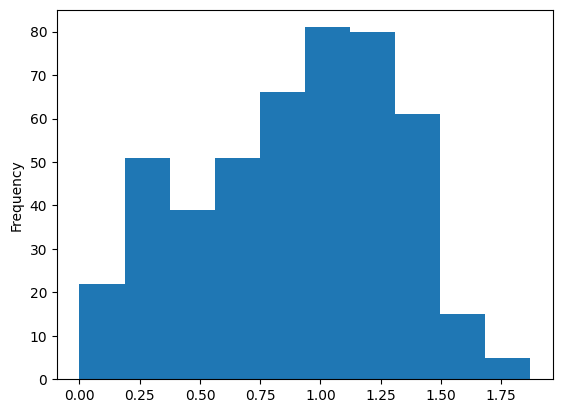

In [14]:
happ.GDP.plot(kind = "hist");

In [35]:
# To create a new column, that bucketizes the GDP into high, low, medium
happ['GDP_cat'] = pd.cut(happ.GDP, bins = [0, 0.5, 1.5, 1.870765686], labels = ['low', 'med', 'high'] )
#happ.loc[:, 'GDP_cat'] = pd.cut(happ.GDP, bins = [0, 0.5, 1.5, 2], labels = ['low', 'med', 'high'] )

In [16]:
happ.loc[0:5, ['GDP', 'GDP_cat']]

,GDP,GDP_cat
0,1.39651,med
1,1.30232,med
2,1.32548,med
3,1.45900,med
4,1.32629,med
5,1.29025,med


In [32]:
# happ.loc[:, ['GDP', 'GDP_cat']].sample(n=10)   # choose several rows randomly
happ.loc[0:10, :].sample(n=3, axis=1)

,Happiness.Score,sqrt_HS,Family
0,7.587,2.754451,1.34951
1,7.561,2.749727,1.40223
2,7.527,2.743538,1.36058
3,7.522,2.742626,1.33095
4,7.427,2.725252,1.32261
5,7.406,2.721397,1.31826
6,7.378,2.716247,1.28017
7,7.364,2.713669,1.28907
8,7.286,2.699259,1.31967
9,7.284,2.698889,1.30923


<a id='categorical'></a>
## Categorical Variables

### Tables of Counts

To summarise categorical variables, one option is to use tables. These tables could present counts of levels, or proportions.

When assessing the relationship between categorical variables, the simplest option is to print a table of counts.

When we wish to assess a variable, or an aggregation of it, conditional on two or more categorical levels, we use a pivot table.

Suppose that, in the happiness dataset, we wish to understand if the distribution of high, low, med GDP has changed in the three years. We can set up a cross-table.

In [46]:
# pd.crosstab(happ.Year, happ.GDP_cat)
happ.pivot_table(index='Year', columns='GDP_cat', values = 'Happiness.Score', aggfunc='count')

GDP_cat,low,med,high
Year,,,
2015,37,116,4
2016,37,116,4
2017,25,117,12


It is interesting to note that in 2017, the tails of the distribution changed the most. We can compute the proportion of high/med/low within each year by adding the normalize argument. What else piques your curiosity?

In [38]:
tab_out = pd.crosstab(happ.Year, happ.GDP_cat, normalize = 'index')   
# each row sum to 1 when it comes to(normalize='index')
tab_out

GDP_cat,low,med,high
Year,,,
2015,0.235669,0.738854,0.025478
2016,0.235669,0.738854,0.025478
2017,0.162338,0.759740,0.077922


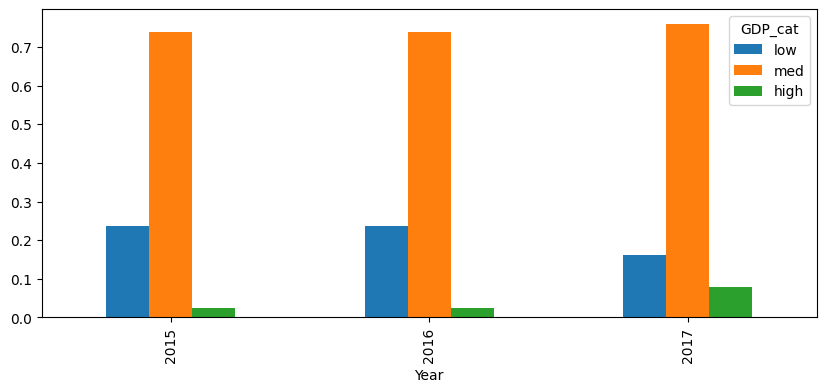

In [39]:
tab_out.plot(kind = 'bar', figsize = (10, 4));

Does Happiness Score change with GDP category (as we have defined them) over the years? To introduce a third variable, we shall have to create a pivot table.

In [40]:
happ.pivot_table(index = 'Year', columns = 'GDP_cat', values = 'Happiness.Score', aggfunc = 'mean')

GDP_cat,low,med,high
Year,,,
2015,4.146135,5.730966,6.66250
2016,4.146135,5.730966,6.66250
2017,4.020160,5.520675,6.72975


To complicate things further, suppose we compare SEA nations to non-SEA nations.

In [47]:
SEA_nations = ['Singapore', 'Malaysia', 'Indonesia', 'Laos', 'Thailand', 'Vietnam', 'Myanmar']
happ['region'] = happ.Country.apply(lambda x: 'SEA' if x in SEA_nations else 'not_SEA')

In [48]:
happ

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year,GDP_cat,region
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,med,not_SEA
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,med,not_SEA
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,med,not_SEA
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,med,not_SEA
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,med,not_SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,not_SEA
488,Laos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,SEA
489,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,not_SEA
490,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,not_SEA


In [49]:
happ.pivot_table(index = ['region', 'Year'], columns = 'GDP_cat', values = 'Happiness.Score', aggfunc = 'mean')
# pass multi-indexes into pivot_table

GDP_cat            low       med      high
region  Year                              
SEA     2015  4.307000  5.572000  6.798000
        2016  4.307000  5.572000  6.798000
        2017  4.545000  5.711000  6.572000
not_SEA 2015  4.141667  5.738126  6.617333
        2016  4.141667  5.738126  6.617333
        2017  3.998292  5.513938  6.744091

<a id='split'></a>
## Split-Apply-Transform

### Grouping

In [53]:
a = happ.groupby(['Country', 'Year'])['Happiness.Score'].mean().sort_values()
a, type(a)

(Country                   Year
 Central African Republic  2017    2.693
 Togo                      2016    2.839
                           2015    2.839
 Burundi                   2017    2.905
                           2016    2.905
                                   ...  
 Suriname                  2017      NaN
 Swaziland                 2017      NaN
 Taiwan                    2017      NaN
 Taiwan Province of China  2015      NaN
                           2016      NaN
 Name: Happiness.Score, Length: 492, dtype: float64,
 pandas.core.series.Series)

In [54]:
happ.groupby('Country')['Happiness.Score'].mean().sort_values(ascending = False).head()

Country
Switzerland    7.556000
Iceland        7.542000
Norway         7.527000
Denmark        7.525333
Finland        7.427000
Name: Happiness.Score, dtype: float64

### Basic Plotting

In [55]:
happ.head()

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year,GDP_cat,region
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,med,not_SEA
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,med,not_SEA
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,med,not_SEA
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,med,not_SEA
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,med,not_SEA


In [60]:
happ.describe(percentiles=[0.25, 0.50, 0.90])

,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,492.000000
mean,79.002123,5.368588,0.891742,1.056156,0.604288,0.422089,0.136741,0.240451,2.017120,2016.000000
std,45.379933,1.138111,0.413322,0.291996,0.246127,0.150433,0.114470,0.129208,0.548021,0.817328
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,40.000000,4.517500,0.593250,0.904550,0.431752,0.319140,0.059815,0.152412,1.684842,2015.000000
50%,79.000000,5.268000,0.958470,1.095620,0.650880,0.436260,0.099872,0.219000,1.978736,2016.000000
90%,142.000000,6.951000,1.386040,1.387777,0.891860,0.614770,0.318834,0.421920,2.765790,2017.000000
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.602140,2017.000000


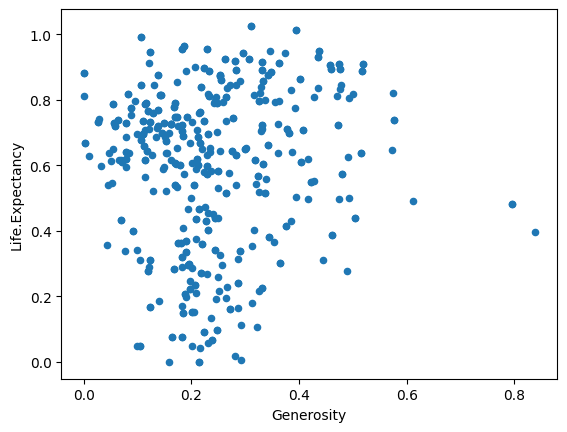

In [61]:
happ.plot(x = 'Generosity', y = 'Life.Expectancy', kind = 'scatter');

In [62]:
happ[happ.Generosity > 0.55]

,Country,Happiness.Rank,Happiness.Score,GDP,Family,Life.Expectancy,Freedom,Govt.Corruption,Generosity,Dystopia.Residual,Year,GDP_cat,region
33,Thailand,34.0,6.455,0.966900,1.265040,0.738500,0.556640,0.031870,0.576300,2.319450,2015,med,SEA
128,Myanmar,129.0,4.307,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,1.418050,2015,low,SEA
197,Thailand,34.0,6.455,0.966900,1.265040,0.738500,0.556640,0.031870,0.576300,2.319450,2016,med,SEA
292,Myanmar,129.0,4.307,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,1.418050,2016,low,SEA
354,Malta,27.0,6.527,1.343280,1.488412,0.821944,0.588767,0.153066,0.574731,1.556863,2017,med,not_SEA
359,Thailand,32.0,6.424,1.127869,1.425792,0.647239,0.580201,0.031613,0.572123,2.039508,2017,med,SEA
408,Indonesia,81.0,5.262,0.995539,1.274445,0.492346,0.443323,0.015317,0.611705,1.429477,2017,med,SEA
441,Myanmar,114.0,4.545,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075,1.115290,2017,low,SEA


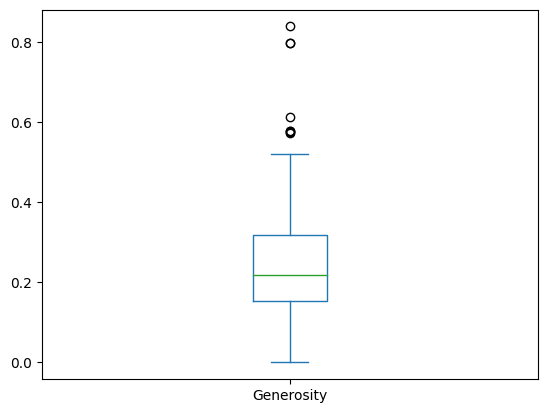

In [63]:
happ.Generosity.plot(kind = 'box');

<a id='multiple'></a>
##  Working with Multiple DataFrames

The following two datasets contain information on the matches played at the 2018 FIFA world cup:

* `match_schedule.xlsx` - contains the schedule of all 64 matches and their outcomes.
* `weatherTable.xlsx` - contains information on the weather at the venue of each match.

In [67]:
weather = pd.read_excel('../data/weatherTable.xlsx')
schedule = pd.read_excel('../data/match_schedule.xlsx')
# You may need to install openpyxl (at command prompt, run pip install openpyxl).a

In [70]:
weather.head()

,description,temperature,wind_speed,humid,match_id
0,Clear Night,17,15,49,300331513
1,Sunny,32,2,19,300331497
2,Clear Night,24,7,17,300331554
3,Sunny,32,10,26,300331530
4,Sunny,27,12,38,300331550


In [71]:
schedule.head()

,match_id,date_time,stadium,venue,match_info,home_team,away_team,HT,FT,2ET,PEN
0,300331495,19 Jun 2018 - 21:00,Saint Petersburg Stadium,St. Petersburg,Group A,RUS,EGY,0-0,3-1,NaN,NaN
1,300331496,20 Jun 2018 - 21:00,Kazan Arena,Kazan,Group B,IRN,ESP,0-0,0-1,NaN,NaN
2,300331497,22 Jun 2018 - 18:00,Volgograd Arena,Volgograd,Group D,NGA,ISL,0-0,2-0,NaN,NaN
3,300331498,01 Jul 2018 - 21:00,Nizhny Novgorod Stadium,Nizhny Novgorod,Round of 16,CRO,DEN,1-1,1-1,1-1,3-2
4,300331499,18 Jun 2018 - 15:00,Nizhny Novgorod Stadium,Nizhny Novgorod,Group F,SWE,KOR,0-0,1-0,NaN,NaN


Both dataframes have a match id column. When we want to merge two dataframes, they have to have common column(s). There are two main types of joins: inner and outer joins. Outer joins are left, right or full joins. 

<img src="../figs/join-outer.png" style="width: 450px;"/>

Inner joins keep only the rows that are present in **both** dataframes.

<img src="../figs/join-inner.png" style="width: 450px;"/>

With pandas, things  get an additional layer of complication. Instead of merging on the column, one can merge based on the index. This will only be appropriate if both indices are of the same type.

In [77]:
sched_weather = pd.merge(schedule, weather, how='outer', on = 'match_id')
"""
pd.DataFrame.merge(
    self,
    right: 'DataFrame | Series',
    how: 'MergeHow' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool | None' = None,
    indicator: 'str | bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
"""
sched_weather

,match_id,date_time,stadium,venue,match_info,home_team,away_team,HT,FT,2ET,PEN,description,temperature,wind_speed,humid
0,300331495,19 Jun 2018 - 21:00,Saint Petersburg Stadium,St. Petersburg,Group A,RUS,EGY,0-0,3-1,NaN,NaN,Cloudy,15,14,83
1,300331496,20 Jun 2018 - 21:00,Kazan Arena,Kazan,Group B,IRN,ESP,0-0,0-1,NaN,NaN,Clear Night,18,26,48
2,300331497,22 Jun 2018 - 18:00,Volgograd Arena,Volgograd,Group D,NGA,ISL,0-0,2-0,NaN,NaN,Sunny,32,2,19
3,300331498,01 Jul 2018 - 21:00,Nizhny Novgorod Stadium,Nizhny Novgorod,Round of 16,CRO,DEN,1-1,1-1,1-1,3-2,Partly Cloudy Night,25,15,48
4,300331499,18 Jun 2018 - 15:00,Nizhny Novgorod Stadium,Nizhny Novgorod,Group F,SWE,KOR,0-0,1-0,NaN,NaN,Partly Cloudy,25,9,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,300331554,18 Jun 2018 - 21:00,Volgograd Arena,Volgograd,Group G,TUN,ENG,1-1,1-2,NaN,NaN,Clear Night,24,7,17
60,300340182,28 Jun 2018 - 20:00,Kaliningrad Stadium,Kaliningrad,Group G,ENG,BEL,0-0,0-1,NaN,NaN,Sunny,21,11,61
61,300340183,22 Jun 2018 - 20:00,Kaliningrad Stadium,Kaliningrad,Group E,SRB,SUI,1-0,1-2,NaN,NaN,Sunny,15,11,55
62,300340184,25 Jun 2018 - 20:00,Kaliningrad Stadium,Kaliningrad,Group B,ESP,MAR,1-1,2-2,NaN,NaN,Partly Cloudy Night,15,13,70


In [79]:
sched_weather.temperature.describe()

count    64.000000
mean     23.750000
std       5.312459
min      12.000000
25%      20.000000
50%      24.000000
75%      27.000000
max      36.000000
Name: temperature, dtype: float64

In [80]:
sched_weather.groupby('venue').temperature.describe()

,count,mean,std,min,25%,50%,75%,max
venue,,,,,,,,
Ekaterinburg,4.0,19.500000,7.593857,12.0,13.50,19.5,25.50,27.0
Kaliningrad,4.0,17.750000,3.201562,15.0,15.00,17.5,20.25,21.0
Kazan,6.0,23.166667,4.665476,18.0,19.25,23.0,27.50,28.0
Moscow,12.0,22.916667,3.502164,17.0,20.75,23.5,24.75,28.0
Nizhny Novgorod,6.0,23.166667,4.535049,17.0,20.50,23.5,25.00,30.0
Rostov-On-Don,5.0,29.000000,3.807887,25.0,25.00,30.0,32.00,33.0
Samara,6.0,27.333333,4.366539,22.0,24.50,26.5,30.75,33.0
Saransk,4.0,22.000000,3.915780,18.0,19.50,21.5,24.00,27.0
Sochi,6.0,25.166667,2.857738,22.0,24.00,24.0,26.25,30.0


In [81]:
sched_weather.groupby('venue')[['temperature', 'wind_speed']].describe()

temperature                                                 \
                      count       mean       std   min    25%   50%    75%   
venue                                                                        
Ekaterinburg            4.0  19.500000  7.593857  12.0  13.50  19.5  25.50   
Kaliningrad             4.0  17.750000  3.201562  15.0  15.00  17.5  20.25   
Kazan                   6.0  23.166667  4.665476  18.0  19.25  23.0  27.50   
Moscow                 12.0  22.916667  3.502164  17.0  20.75  23.5  24.75   
Nizhny Novgorod         6.0  23.166667  4.535049  17.0  20.50  23.5  25.00   
Rostov-On-Don           5.0  29.000000  3.807887  25.0  25.00  30.0  32.00   
Samara                  6.0  27.333333  4.366539  22.0  24.50  26.5  30.75   
Saransk                 4.0  22.000000  3.915780  18.0  19.50  21.5  24.00   
Sochi                   6.0  25.166667  2.857738  22.0  24.00  24.0  26.25   
St. Petersburg          7.0  20.428571  4.035556  15.0  18.00  19.0  23.50   
Volgograd               4.0  31.750000  5.439056  24.0  30.00  33.5  35.25   

                      wind_speed                                          \
                  max      count       mean       std   min    25%   50%   
venue                                                                      
Ekaterinburg     27.0        4.0  23.500000  4.932883  18.0  20.25  23.5   
Kaliningrad      21.0        4.0  10.500000  2.516611   7.0  10.00  11.0   
Kazan            28.0        6.0  15.333333  6.918574   8.0   9.75  15.0   
Moscow           28.0       12.0  11.250000  5.785955   3.0   6.75  11.0   
Nizhny Novgorod  30.0        6.0  13.333333  2.338090   9.0  13.00  14.0   
Rostov-On-Don    33.0        5.0  13.400000  5.029911   9.0  10.00  11.0   
Samara           33.0        6.0  15.166667  7.626707   6.0   8.75  16.0   
Saransk          27.0        4.0  10.000000  2.449490   7.0   8.50  10.5   
Sochi            30.0        6.0  11.000000  0.894427  10.0  10.25  11.0   
St. Petersburg   26.0        7.0  13.571429  3.690399  10.0  10.50  13.0   
Volgograd        36.0        4.0   8.000000  4.690416   2.0   5.75   8.5   

                              
                   75%   max  
venue                         
Ekaterinburg     26.75  29.0  
Kaliningrad      11.50  13.0  
Kazan            18.75  26.0  
Moscow           12.25  24.0  
Nizhny Novgorod  15.00  15.0  
Rostov-On-Don    16.00  21.0  
Samara           20.25  25.0  
Saransk          12.00  12.0  
Sochi            11.75  12.0  
St. Petersburg   16.00  19.0  
Volgograd        10.75  13.0

The other pandas functions for joining datasets that you should be aware of is `pd.concat`. This is appropriate when you are adding new rows to a dataframe (ingore the index) or new columns (may need to ignore index).

<a id='ref'></a>
# 3. References and Links
<a href=#top>(back to top)</a>

1. [Numpy user manual](https://numpy.org/doc/stable/user/index.html)
2. [10-minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) User manuals and references can be found through here.
3. [Selection with Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) Using .loc and .iloc.
4. [World Happiness Report](https://worldhappiness.report/ed/2017/)